***Đề Tài 2: Network Intrusion Detection trên Bộ Dataset Kaggle***

- Ý Tưởng:
Đề tài này tập trung vào việc phát triển một mô hình phát hiện xâm nhập mạng (NID - Network Intrusion Detection) sử dụng bộ dataset từ Kaggle. Mô hình sẽ được huấn luyện để nhận diện các hoạt động bất thường hoặc độc hại trong mạng, dựa trên phân tích lưu lượng mạng và các giao dịch mạng khác nhau.

- Ý Nghĩa của Đề Tài:
  - *Nâng Cao Bảo Mật Mạng:* Phát hiện và cảnh báo sớm về các hoạt động độc hại, giúp ngăn chặn các cuộc tấn công mạng.
  - *Giảm Thiểu Rủi Ro:* Giảm thiểu rủi ro về mất mát dữ liệu và thiệt hại về tài chính do các cuộc tấn công mạng.
  - *Cải Thiện Phản Ứng Trước Sự Cố:* Cung cấp thông tin chi tiết về các mối đe dọa, giúp các tổ chức phản ứng nhanh chóng và hiệu quả trước các sự cố bảo mật.

- Lý Do Chọn Đề Tài:
  - Với sự gia tăng của các mối đe dọa mạng, việc phát triển công cụ phát hiện xâm nhập mạng hiệu quả trở thành một nhu cầu cấp thiết, góp phần bảo vệ hạ tầng mạng và dữ liệu quan trọng.

Cả hai đề tài đều mang lại giá trị thiết thực trong bối cảnh


# ***1. Import Data and Data Visualization***


https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection
- Train_data.csv có nhãn 0, 1
- Test_data.csv chưa có nhãn.

Tập dữ liệu được sử dụng để xây dựng và đánh giá các mô hình phát hiện xâm nhập mạng trong nghiên cứu này được cung cấp thông qua một môi trường mạng quân sự mô phỏng đa dạng các loại xâm nhập. Dữ liệu TCP/IP thô được thu thập từ việc mô phỏng một mạng LAN điển hình của Không quân Hoa Kỳ, được thiết lập như một môi trường thực tế và chịu đựng nhiều cuộc tấn công. Một kết nối được định nghĩa là chuỗi các gói tin TCP bắt đầu và kết thúc trong một khoảng thời gian nhất định, trong đó dữ liệu được truyền từ một địa chỉ IP nguồn đến địa chỉ IP đích theo một giao thức rõ ràng. Mỗi kết nối được gắn nhãn là bình thường hoặc là một cuộc tấn công với một loại tấn công cụ thể.
Mỗi bản ghi kết nối chứa khoảng 100 byte thông tin được thu thập từ dữ liệu bình thường và tấn công, bao gồm 41 đặc trưng định lượng và định tính (3 đặc trưng định tính và 38 đặc trưng định lượng). Biến phân loại có hai danh mục:

- Bình Thường (Normal): Các kết nối không chứa hoạt động đáng ngờ hoặc tấn công.
- Bất Thường (Anomalous): Các kết nối chứa hoạt động xâm nhập hoặc tấn công, được gắn nhãn cụ thể với một loại hình tấn công nhất định.

Tập dữ liệu này cung cấp một cơ sở thực tế và chi tiết để phát triển và kiểm tra các thuật toán phát hiện xâm nhập, từ đó tăng cường khả năng phòng thủ của mạng trước các nguy cơ an ninh mạng hiện đại và phức tạp.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Import data

# train=pd.read_csv('/content/drive/MyDrive/CS/Train_data.csv')
train_df=pd.read_csv('Train_data.csv')
# test=pd.read_csv('/content/drive/MyDrive/CS/Test_data.csv')
test_df=pd.read_csv('Test_data.csv')

In [ ]:
train_df.head()  # In 5 dòng đầu tiên của dữ liệu

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train_df.info() # Print concise summary (tổng kết ngắn gọn) of Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
test_df.info() # Print concise summary (tổng kết ngắn gọn) of Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
train_df.describe()

# 1. **count**: Số lượng giá trị không phải NaN trong mỗi cột.
# 2. **mean**: Giá trị trung bình của mỗi cột.
# 3. **std**: Độ lệch chuẩn, thể hiện sự phân tán của dữ liệu so với giá trị trung bình.
# 4. **min**: Giá trị nhỏ nhất trong mỗi cột.
# 5. **25%**: Phân vị thứ 25, còn được gọi là phân vị thứ nhất hoặc tứ phân vị dưới, nơi 25% giá trị nằm dưới giá trị này.
# 6. **50%**: Phân vị thứ 50 hoặc giá trị trung vị, nơi có 50% giá trị nằm dưới và 50% nằm trên giá trị này.
# 7. **75%**: Phân vị thứ 75, còn gọi là phân vị thứ ba hoặc tứ phân vị trên, nơi 75% giá trị nằm dưới giá trị này.
# 8. **max**: Giá trị lớn nhất trong mỗi cột.


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***2. Data Visualization - Exploratory Data Analysis - Data Pre-Processing :***
2.1 Xử lý dữ liệu dạng null và dữ liệu dạng chuỗi.

a. Xử lý Null

b. Xử lý dữ liệu dạng chuỗi:
  Mã hóa: Các cột dạng object như `protocol_type`, `service`, và `flag` nên được mã hóa thành dữ liệu số, bằng cách sử dụng LabelEncoder hoặc OneHotEncoder từ sklearn.preprocessing.
  - `pd.to_numeric`:  chuyển đổi dữ liệu cột chứa số nhưng được định dạng là chuỗi thành số. (errors='coerce') (nếu không thể, nó sẽ trả về NaN).
  - `LabelEncoder` gán mỗi danh mục một số nguyên. Ví dụ, `['red', 'blue', 'green']` có thể được chuyển đổi thành `[0, 1, 2]`.
  - `OneHotEncoder` biến danh mục thành vector nhị phân, tránh thiên vị số nguyên. Ví dụ, `['red', 'blue', 'green']` có thể được chuyển đổi thành `[1, 0, 0], [0, 1, 0], [0, 0, 1]`.

2.2 Simple Feature Selection: Kiểm tra xem có cột nào mà giá trị trong cột giống nhau hoàn toàn ko?

2.3 Xem Class Distribution để xem phân phối dữ liệu, xem có cần SMOTE hay gì ko. Trong bài này thì dữ liệu 2 tập phân phối khá đồng đều nên ko cần cân bằng dữ liệu, ...
2.4 Split dataset thành 2 tập 70-30

## 2.1 Xử lý dữ liệu dạng null và dữ liệu dạng chuỗi.


In [ ]:
train_df.isnull().sum() # Đếm số lượng giá trị null trong mỗi cột của DataFrame

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
train_df.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

def encoder(df):
    for col in df.columns: # for col in ['protocol_type', 'service', 'flag']:
        if df[col].dtype == 'object':
                df[col] = label_encoder.fit_transform(df[col])
encoder(train_df)
encoder(test_df)


In [ ]:
# Kiểm tra lại xem các cột: ['protocol_type', 'service', 'flag'] đã được ENCODER chưa
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


## 2.2 Feature Selection:
1. Kiểm tra xem có cột nào mà giá trị trong cột giống nhau hoàn toàn ko?

In [ ]:
# 1. Kiểm tra xem có cột nào mà giá trị trong cột giống nhau hoàn toàn ko?
def check(df):
    for col in df.columns: # for col in ['protocol_type', 'service', 'flag']:
        # print(f"Col {col} có", len(df[col].value_counts()), "giá trị phân biệt")
        if df[col].nunique() == 1:
            print(f"Col {col} HAVE:", len(df[col].value_counts()), "giá trị phân biệt", "=> Tất cả dữ liệu trong cột này giống nhau. Có thể loại bỏ cột.")
        # else:
        #     print(f"Col {col} HAVE", len(df[col].value_counts()), "giá trị phân biệt", "=> Không nên loại bỏ cột.")

check(train_df)
check(test_df)



Col num_outbound_cmds HAVE: 1 giá trị phân biệt => Tất cả dữ liệu trong cột này giống nhau. Có thể loại bỏ cột.
Col is_host_login HAVE: 1 giá trị phân biệt => Tất cả dữ liệu trong cột này giống nhau. Có thể loại bỏ cột.
Col num_outbound_cmds HAVE: 1 giá trị phân biệt => Tất cả dữ liệu trong cột này giống nhau. Có thể loại bỏ cột.


In [ ]:
# Trong tập train: feature `num_outbound_cmds` và `is_host_login` có tất cả các sample đều có value bằng nhau.
# Trong tập test: thì chỉ có cột `num_outbound_cmds`

# Loại bỏ cột
train_df.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
# Kiểm tra xem cột feature `num_outbound_cmds` đã được drop chưa
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

## 2.3. Xem Class Distribution
Xem phân phối của các lớp trong tập huấn luyện (class distribution)

Class distribution Training set:
1    13449
0    11743
Name: class, dtype: int64


<Axes: xlabel='class', ylabel='count'>

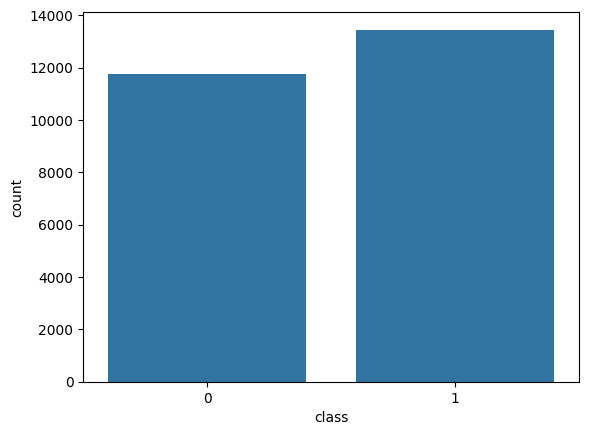

In [ ]:
# Xem phân phối của các lớp trong tập huấn luyện (class distribution)
# xác định xem dữ liệu có bị lệch (imbalanced) hay không, -> Liên quan đến cách chọn mô hình và áp dụng các kỹ thuật cân bằng dữ liệu.

print('Class distribution Training set:')
print(train_df['class'].value_counts()) # value_counts: số lượng mỗi giá trị

import seaborn as sns # Import thư viện Seaborn để vẽ biểu đồ

# Sẽ tạo một biểu đồ cột, mỗi cột biểu diễn số lượng mẫu thuộc về một lớp (hoặc nhóm) cụ thể.
sns.countplot(x=train_df['class']) # sns.countplot() sử dụng để vẽ biểu đồ đếm số lượng (count plot).



## ***2.4 Split Train - Val dataset***
- Chia dataset thành tập train và tập valid để đánh giá mô hình theo tỷ lệ 70-30


In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['class'], axis=1)  # # Loại bỏ cột 'class' để lấy features'
y = train_df['class'] # Target variable: biến mục tiêu

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm định
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2)


In [ ]:
# Có thể chuẩn hóa Data hoặc không
# Chuẩn hóa dữ liệu: chỉ có đầu vào (features) cần được chuẩn hóa; đầu ra (target) không cần phải chuẩn hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val) # Đảm bảo rằng dữ liệu mới không bị rò rỉ thông tin vào quá trình chuẩn hóa
                        # (ví dụ, không sử dụng fit_transform() trên dữ liệu mới, chỉ sử dụng transform()).


# ***3. Chọn và Huấn luyện Mô hình:***
- Lựa chọn mô hình phù hợp với bài toán phân loại. Có thể bắt đầu với mô hình cơ bản như `Logistic Regression` hoặc sử dụng các mô hình phức tạp hơn như
## **3.1 Feature Selection with RFE**
- Lựa chọn các feature tính năng quan trọng cho training process (quá trình training)
## ***3.2 Training with many Model with default parameters***
(Train với các tham số mặc định của các model).
- Chú ý: set random_state=1 số cố định (thường là 42, 0, hoặc 1, ... ) để kết quả được cố định mỗi lần chạy.
**There are a number of classification models:**
1.   Logistic Regression
2.   KNN
3.   Decision Tree
4.   Random forest
5.   Gradient-Boosted tree
6.   Support Vector Machine (SVM)
7.   One-vs-Rest (mainly for multiple class)
8.   Naive Bayes
9.   Multilayer Perceptron



In [ ]:
# Train with basic model
from sklearn.ensemble import RandomForestClassifier # train
from sklearn.metrics import accuracy_score, classification_report # đánh giá model

# Khởi tạo basic model
basic_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Huấn luyện mô hình trên tập dữ liệu đã được chuẩn hóa
basic_model.fit(X_train_scaled, y_train)  # Sử dụng y_train, không cần chuẩn hóa

# Đánh giá mô hình trên tập dữ liệu kiểm định đã được chuẩn hóa
y_pred = basic_model.predict(X_val_scaled)  # Dùng X_val_scaled chứ không phải X_val
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Đánh giá mô hình trên tập dữ liệu kiểm định đã được chuẩn hóa
y_pred = basic_model.predict(X_val_scaled)  # Dùng X_val_scaled chứ không phải X_val
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.9966922466260916
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

Accuracy: 0.9966922466260916
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



## **3.1 Feature Selection with RFE**
- Lựa chọn các feature tính năng quan trọng cho training process (quá trình training)

In [ ]:
# Sử dụng RFE để
from sklearn.feature_selection import RFE # Thư viện để thực hiện lựa chọn đặc trưng
from sklearn.ensemble import RandomForestClassifier # Mô hình phân loại Random Forest

rfc = RandomForestClassifier() # Khởi tạo mô hình Random Forest Classifier

rfe = RFE(estimator=rfc, n_features_to_select=10) # Khởi tạo RFE với mô hình Random Forest làm bộ ước lượng, VỚI SỐ LƯỢNG ĐẶC TRƯNG FEATURES muốn chọn là 10
rfe = rfe.fit(X_train_scaled, y_train) # Huấn luyện RFE trên tập dữ liệu huấn luyện

# # Tạo map giữa trạng thái lựa chọn đặc trưng (True/False) và tên cột
# feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
# selected_features = [v for i, v in feature_map if i==True] # Lọc ra các tên đặc trưng được chọn (có trạng thái True)

# Sử dụng thuộc tính support_ để lọc ra các đặc trưng được chọn
selected_features = X_train.columns[rfe.support_]
print(selected_features) # In ra danh sách các đặc trưng được lựa chọn

Index(['protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate'],
      dtype='object')


## ***3.2 Training with many Model with default parameters***
(Train với các tham số mặc định của các model).
- Chú ý: set random_state=1 số cố định (thường là 42, 0, hoặc 1, ... ) để kết quả được cố định mỗi lần chạy.
**There are a number of classification models:**
1.   Logistic Regression
2.   KNN
3.   Decision Tree
4.   Random forest
5.   Gradient-Boosted tree
6.   Support Vector Machine (SVM)
7.   One-vs-Rest (mainly for multiple class)
8.   Naive Bayes
9.   Multilayer Perceptron



In [ ]:
# Chuẩn bị dữ liệu với các đặc trưng đã được chọn
X_train_selected = X_train_scaled[:, rfe.support_]
X_val_selected = X_val_scaled[:, rfe.support_]

In [ ]:
# 5 models đầu
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# thêm 4 models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Khởi tạo 5 Model trước, 4 model khởi tạo bên dưới
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # knn bỏ random_states
svc = SVC(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Khởi tạo thêm 4 mô hình bổ sung, -> tổng là 9 mô hình
gb = GradientBoostingClassifier(random_state=42)
mlp = MLPClassifier(random_state=42)
ovr = OneVsRestClassifier(estimator=SVC(random_state=42))
nb = GaussianNB()   # BỎ random_state=42

models = {
  # Danh sách 5 mô hình để huấn luyện,
    'Logistic Regression': logreg,
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': svc,
  # Thêm các mô hình mới vào danh sách mô hình, tổng là 9
    'Gradient Boosting': gb,
    'One-vs-Rest': ovr,
    'Naive Bayes': nb,
    'Multilayer Perceptron': mlp,
}

models

{'Logistic Regression': LogisticRegression(random_state=42),
 'KNN': KNeighborsClassifier(),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'SVM': SVC(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'One-vs-Rest': OneVsRestClassifier(estimator=SVC(random_state=42)),
 'Naive Bayes': GaussianNB(),
 'Multilayer Perceptron': MLPClassifier(random_state=42)}

In [ ]:
# TẠO REPORT 4 METRICS của quá trình training 9 models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

report_data = [] # Chuẩn bị dictionary để lưu thông tin đánh giá

# Huấn luyện, đánh giá mô hình và thu thập dữ liệu cho report
for name, model in models.items():

    model.fit(X_train_selected, y_train)     # Huấn luyện mô hình
    y_pred = model.predict(X_val_selected)     # Dự đoán trên tập kiểm định

    # Thu thập dữ liệu đánh giá, gồm 4 metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f_score = f1_score(y_val, y_pred, average='macro')

    report_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F-Score': f_score
    })

# Tạo DataFrame từ dictionary
model_report_df = pd.DataFrame(report_data)

# Đặt chỉ số là tên của mỗi mô hình
model_report_df.set_index('Model', inplace=True)

# Sort the DataFrame by "Accuracy" in descending order
sorted_model_report_df = model_report_df.sort_values(by="Accuracy", ascending=False)

# In ra DataFrame
sorted_model_report_df

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Accuracy,Precision,Recall,F-Score
Model,,,,
Random Forest,0.995766,0.995782,0.995703,0.995742
Decision Tree,0.994972,0.994944,0.994944,0.994944
Gradient Boosting,0.992061,0.991961,0.992077,0.992018
KNN,0.982403,0.982471,0.982137,0.982299
Multilayer Perceptron,0.982270,0.982248,0.982093,0.982169
SVM,0.965467,0.965489,0.965048,0.965259
One-vs-Rest,0.965467,0.965489,0.965048,0.965259
Logistic Regression,0.938873,0.939406,0.937682,0.938420
Naive Bayes,0.891770,0.897371,0.887429,0.890070


# ***4. Tuning Model: Điều chỉnh siêu tham số của Model***
- Cách 1: Tuning thủ công: sử dụng `Gird Search`, `Random Search` với `for` ...
- Cách 2: `Optuna` lib is an optimization library that simplifies the process of finding the best hyperparameters for your machine learning models. It provides an efficient way to conduct hyperparameter tuning, which is crucial for improving model performance. This process is known as hyperparameter optimization (HPO).

## 4.1 Test = TUNING LogisticRegression
## 4.2 TUNING bằng Optuna với 3 model tốt nhất là 3 model: Random Forest, Decision Tree, Gradient Boosting
(ngoài ra tuning thêm với Logistic Regression - model đơn giản nhất).

Sau đó: ### Retraining các Models with BEST PARAMETERS thu được từ quá trình TUNING.



In [ ]:
!pip install optuna  # THƯ VIỆN TUNING - ĐIỀU CHỈNH SIÊU THAM SỐ ĐỂ TÌM BỘ THAM SỐ TỐT NHẤT CHO MODEL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.9 MB/s eta 0:00:00


## 4.1 Test = TUNING LogisticRegression

In [ ]:
# Test TUNING LogisticRegression

import optuna
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hàm mục tiêu để tối ưu hóa
def objective(trial):
    # Chọn một phân loại từ danh sách các phân loại
    classifier_name = trial.suggest_categorical('classifier', ['LogisticRegression',])

    if classifier_name == 'LogisticRegression': # Nếu phân loại được chọn là LogisticRegression
      # Tạo một mô hình với tham số được chọn bởi Optuna
        C = trial.suggest_float('C', 1e-4, 1e4, log=True)
        model = LogisticRegression(C=C, random_state=42) # 42 để cố định sự ngẫu nhiên mỗi lần run.

    # Huấn luyện mô hình
    model.fit(X_train_selected, y_train)

    # Đánh giá mô hình với cả 4 chỉ số chưa nghĩ ra được.
    # ĐÁNH RA MODEL với chỉ số accuracy
    y_pred = model.predict(X_val_selected)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy  # Hoặc bạn có thể trả về dictionary như trên nếu bạn muốn tối ưu hóa nhiều mục tiêu

# Tạo một study object và tối ưu hóa nó
start = time.time()  # Bắt đầu tính thời gian OPTIMIZATION
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
end = time.time()  # Kết thúc tính thời gian
duration = end - start

# Kết quả tốt nhất và tham số tốt nhất
best_trial = study.best_trial
best_score = best_trial.value  # Chỉ sử dụng .value nếu bạn trả về một giá trị duy nhất từ hàm mục tiêu
best_params = best_trial.params
print(f"Best score: {best_score}")
print(f"Optimized parameters: {best_params}")
print(f"Optimization took {duration} seconds")


[I 2024-03-14 06:13:45,210] A new study created in memory with name: no-name-a9b98e16-29d6-4fad-b397-d0cd0cdde81e
[I 2024-03-14 06:13:45,308] Trial 0 finished with value: 0.9400635088647791 and parameters: {'classifier': 'LogisticRegression', 'C': 0.05378153848045095}. Best is trial 0 with value: 0.9400635088647791.
[I 2024-03-14 06:13:45,425] Trial 1 finished with value: 0.9390050277851283 and parameters: {'classifier': 'LogisticRegression', 'C': 33.746392772562764}. Best is trial 0 with value: 0.9400635088647791.
[I 2024-03-14 06:13:45,513] Trial 2 finished with value: 0.939269648055041 and parameters: {'classifier': 'LogisticRegression', 'C': 0.25587426676985375}. Best is trial 0 with value: 0.9400635088647791.
[I 2024-03-14 06:13:45,572] Trial 3 finished with value: 0.938872717650172 and parameters: {'classifier': 'LogisticRegression', 'C': 4.5232789925800825}. Best is trial 0 with value: 0.9400635088647791.
[I 2024-03-14 06:13:45,633] Trial 4 finished with value: 0.939269648055041

Best score: 0.9416512304842551
Optimized parameters: {'classifier': 'LogisticRegression', 'C': 0.016936168606756827}
Optimization took 6.272033929824829 seconds


Kết quả của LogisticRegression trước Tuning là: 0.921540

## 4.2 TUNING với 3 model tốt nhất là 3 model: Random Forest, Decision Tree, Gradient Boosting
(ngoài ra tuning thêm với Logistic Regression - model đơn giản nhất).

Sau đó: ### Retraining các Models with BEST PARAMETERS thu được từ quá trình TUNING.


In [ ]:

### TUNING với 3 model. Random Forest, Decision Tree, Gradient Boosting

# DEFINE hàm mục tiêu
def objective(trial, model_name): # thêm model_name làm tham số
    if model_name == 'LogisticRegression':
      # Tạo một mô hình với tham số được chọn bởi Optuna
        C = trial.suggest_float('C', 1e-4, 1e4, log=True)
        model = LogisticRegression(C=C, random_state=42) # 42 để cố định sự ngẫu nhiên mỗi lần run.
    elif model_name == 'RandomForest':                    # KO CÓ 42 thì mỗi lần run ra 1 kết quả
        n_estimators = trial.suggest_int('n_estimators', 10, 1000)
        max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    elif model_name == 'DecisionTree':
        max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    elif model_name == 'GradientBoosting':
        n_estimators = trial.suggest_int('n_estimators', 10, 1000)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1, log=True)
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

    # Huấn luyện mô hình
    model.fit(X_train_selected, y_train)

    # Đánh giá mô hình với cả 4 chỉ số chưa nghĩ ra được.
    # ĐÁNH RA MODEL với chỉ số accuracy
    y_pred = model.predict(X_val_selected)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy  # Hoặc bạn có thể trả về dictionary như trên nếu bạn muốn tối ưu hóa nhiều mục tiêu

# # Tạo một study object và tối ưu hóa nó
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# Bảng để lưu kết quả
tuningmodel_report_data = []

# Danh sách các mô hình
model_names = ['LogisticRegression']
model_names = [
    'LogisticRegression', 'RandomForest', 'DecisionTree',
    'GradientBoosting',
    ]

# Tối ưu hóa cho mỗi mô hình
for model_name in model_names:
    print("--------------")
    print(f"Start: Tuning {model_name}")
    start_time = time.time()

    study = optuna.create_study(direction='maximize')
    # study.optimize(objective, n_trials=10)
    # Chú ý: Bây giờ chúng ta truyền model_name vào hàm objective
    num_trials = 100 # 2  # Thay đổi số VÒNG LẶP TUNING.
    study.optimize(lambda trial: objective(trial, model_name), n_trials=num_trials) # QUÁ TRÌNH HỌC STUDY - OPTIMIZATION
                                                              # của các parameters
    # study.optimize(): phương thức bắt đầu quá trình training,

    optimization_time = time.time() - start_time

    # Lưu kết quả tối ưu nhất - CHỈ SỬ DỤNG BEST_ACCURACY
    # best_accuracy, best_precision, best_recall, best_f_score = study.best_trial.values
    best_trial = study.best_trial  # Lưu toàn bộ thông tin best hiện tại

    tuningmodel_report_data.append({
        'Model': model_name,
        'Accuracy': best_trial.value,
        'Optimization Time': optimization_time,
        'Optimizated Parameters': best_trial.params,
    })

    print(f"Finished: Tuning {model_name} with {num_trials} trials")
    print(f"Best score: {best_trial.value}") # In value best score
    print(f"Optimized parameters: {best_trial.params}") # In tham số tối ưu
    print(f"Optimization took {optimization_time} seconds")

# # Kết quả tốt nhất và tham số tốt nhất
# best_trial = study.best_trial
# best_score = best_trial.value  # Chỉ sử dụng .value nếu bạn trả về một giá trị duy nhất từ hàm mục tiêu
# best_params = best_trial.params
# best_duration = best_trial.user_attrs['duration']
# print(f"Best score: {best_score}")
# print(f"Optimized parameters: {best_params}")
# print(f"Optimization took {best_duration} seconds")

# Chuyển đổi kết quả thành DataFrame
tuningmodel_report_df= pd.DataFrame(tuningmodel_report_data)
tuningmodel_report_df = tuningmodel_report_df.set_index('Model')

# Sort the DataFrame by "Accuracy" in descending order
sorted_tuningmodel_report_df = tuningmodel_report_df.sort_values(by="Accuracy", ascending=False)

# In ra DataFrame
sorted_tuningmodel_report_df



[I 2024-03-14 06:13:51,515] A new study created in memory with name: no-name-10629fc8-a5b6-4d50-949e-37ecd8463d6c
[I 2024-03-14 06:13:51,549] Trial 0 finished with value: 0.9329187615771368 and parameters: {'C': 0.001503860777497471}. Best is trial 0 with value: 0.9329187615771368.
[I 2024-03-14 06:13:51,591] Trial 1 finished with value: 0.940857369674517 and parameters: {'C': 0.034089246778453375}. Best is trial 1 with value: 0.940857369674517.
[I 2024-03-14 06:13:51,636] Trial 2 finished with value: 0.939269648055041 and parameters: {'C': 0.24067297805359678}. Best is trial 1 with value: 0.940857369674517.
[I 2024-03-14 06:13:51,665] Trial 3 finished with value: 0.9225985710505424 and parameters: {'C': 0.00031317494759158354}. Best is trial 1 with value: 0.940857369674517.


--------------
Start: Tuning LogisticRegression


[I 2024-03-14 06:13:51,727] Trial 4 finished with value: 0.9390050277851283 and parameters: {'C': 1779.6400860246652}. Best is trial 1 with value: 0.940857369674517.
[I 2024-03-14 06:13:51,769] Trial 5 finished with value: 0.940857369674517 and parameters: {'C': 0.008479117563797005}. Best is trial 1 with value: 0.940857369674517.
[I 2024-03-14 06:13:51,832] Trial 6 finished with value: 0.9390050277851283 and parameters: {'C': 250.79764718989176}. Best is trial 1 with value: 0.940857369674517.
[I 2024-03-14 06:13:51,882] Trial 7 finished with value: 0.939269648055041 and parameters: {'C': 0.18195478899100842}. Best is trial 1 with value: 0.940857369674517.
[I 2024-03-14 06:13:51,942] Trial 8 finished with value: 0.9390050277851283 and parameters: {'C': 10.794683443987648}. Best is trial 1 with value: 0.940857369674517.
[I 2024-03-14 06:13:51,999] Trial 9 finished with value: 0.9390050277851283 and parameters: {'C': 168.11454766860027}. Best is trial 1 with value: 0.940857369674517.
[I 

Finished: Tuning LogisticRegression with 100 trials
Best score: 0.9417835406192114
Optimized parameters: {'C': 0.01986580622728322}
Optimization took 9.50798773765564 seconds
--------------
Start: Tuning RandomForest


[I 2024-03-14 06:14:04,192] Trial 0 finished with value: 0.9956337655464409 and parameters: {'n_estimators': 142, 'max_depth': 29}. Best is trial 0 with value: 0.9956337655464409.
[I 2024-03-14 06:14:05,794] Trial 1 finished with value: 0.9957660756813972 and parameters: {'n_estimators': 75, 'max_depth': 14}. Best is trial 1 with value: 0.9957660756813972.
[I 2024-03-14 06:14:13,290] Trial 2 finished with value: 0.9955014554114845 and parameters: {'n_estimators': 261, 'max_depth': 17}. Best is trial 1 with value: 0.9957660756813972.
[I 2024-03-14 06:14:24,921] Trial 3 finished with value: 0.9955014554114845 and parameters: {'n_estimators': 432, 'max_depth': 15}. Best is trial 1 with value: 0.9957660756813972.
[I 2024-03-14 06:14:33,166] Trial 4 finished with value: 0.9956337655464409 and parameters: {'n_estimators': 463, 'max_depth': 19}. Best is trial 1 with value: 0.9957660756813972.
[I 2024-03-14 06:14:38,444] Trial 5 finished with value: 0.9708917703096057 and parameters: {'n_estim

Finished: Tuning RandomForest with 100 trials
Best score: 0.9960306959513099
Optimized parameters: {'n_estimators': 23, 'max_depth': 22}
Optimization took 273.03132128715515 seconds
--------------
Start: Tuning DecisionTree


[I 2024-03-14 06:18:34,294] Trial 6 finished with value: 0.9947075946017465 and parameters: {'max_depth': 13}. Best is trial 3 with value: 0.9949722148716592.
[I 2024-03-14 06:18:34,313] Trial 7 finished with value: 0.9442974331833819 and parameters: {'max_depth': 2}. Best is trial 3 with value: 0.9949722148716592.
[I 2024-03-14 06:18:34,340] Trial 8 finished with value: 0.9753903148981212 and parameters: {'max_depth': 4}. Best is trial 3 with value: 0.9949722148716592.
[I 2024-03-14 06:18:34,386] Trial 9 finished with value: 0.9949722148716592 and parameters: {'max_depth': 12}. Best is trial 3 with value: 0.9949722148716592.
[I 2024-03-14 06:18:34,440] Trial 10 finished with value: 0.9949722148716592 and parameters: {'max_depth': 28}. Best is trial 3 with value: 0.9949722148716592.
[I 2024-03-14 06:18:34,492] Trial 11 finished with value: 0.9949722148716592 and parameters: {'max_depth': 32}. Best is trial 3 with value: 0.9949722148716592.
[I 2024-03-14 06:18:34,543] Trial 12 finished 

Finished: Tuning DecisionTree with 100 trials
Best score: 0.9951045250066155
Optimized parameters: {'max_depth': 15}
Optimization took 5.1799232959747314 seconds
--------------
Start: Tuning GradientBoosting


[I 2024-03-14 06:18:52,344] Trial 0 finished with value: 0.9708917703096057 and parameters: {'n_estimators': 649, 'learning_rate': 0.0002986962608925053}. Best is trial 0 with value: 0.9708917703096057.
[I 2024-03-14 06:19:05,475] Trial 1 finished with value: 0.9970891770309606 and parameters: {'n_estimators': 697, 'learning_rate': 0.3746795639171706}. Best is trial 1 with value: 0.9970891770309606.
[I 2024-03-14 06:19:13,051] Trial 2 finished with value: 0.9841227838052394 and parameters: {'n_estimators': 368, 'learning_rate': 0.006240685494458875}. Best is trial 1 with value: 0.9970891770309606.
[I 2024-03-14 06:19:19,271] Trial 3 finished with value: 0.9928552527123577 and parameters: {'n_estimators': 353, 'learning_rate': 0.036137900215113886}. Best is trial 1 with value: 0.9970891770309606.
[I 2024-03-14 06:19:34,922] Trial 4 finished with value: 0.9730087324689071 and parameters: {'n_estimators': 810, 'learning_rate': 0.0009276126522370942}. Best is trial 1 with value: 0.99708917

Finished: Tuning GradientBoosting with 100 trials
Best score: 0.9973537973008733
Optimized parameters: {'n_estimators': 714, 'learning_rate': 0.34365258984288877}
Optimization took 1170.513364315033 seconds


,Accuracy,Optimization Time,Optimizated Parameters
Model,,,
GradientBoosting,0.997354,1170.513364,"{'n_estimators': 714, 'learning_rate': 0.34365..."
RandomForest,0.996031,273.031321,"{'n_estimators': 23, 'max_depth': 22}"
DecisionTree,0.995105,5.179923,{'max_depth': 15}
LogisticRegression,0.941784,9.507988,{'C': 0.01986580622728322}


In [ ]:
# Tìm hiểu dataframe mới tạo: sorted_tuningmodel_report_df
# Thử lấy train lại model LogisticRegression với BEST PARAMETES.
print(sorted_tuningmodel_report_df.columns)
print(sorted_tuningmodel_report_df.index) # Check current index

# Get the value in the 'Optimizated Parameters' column for the row where 'Model' = 'RandomForest'
# optimiz_params = sorted_tuningmodel_report_df.loc[sorted_tuningmodel_report_df['Model'] == 'RandomForest', 'Optimized Parameters'].values[0]
# 'RandomForest' is an index rather than a column
rf_opt_params = sorted_tuningmodel_report_df.loc['LogisticRegression', 'Optimizated Parameters']
print(rf_opt_params, type(rf_opt_params))

logistic_reg = LogisticRegression(**rf_opt_params, random_state=42)
logistic_reg.fit(X_train_selected, y_train)

# Dự đoán trên tập kiểm định
y_pred = logistic_reg.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

# CHECK XEM: ACCURACY CÓ TRÙNG KHI RETRAINING MODEL WITH BEST PARAMS after TUNING.

Index(['Accuracy', 'Optimization Time', 'Optimizated Parameters'], dtype='object')
Index(['GradientBoosting', 'RandomForest', 'DecisionTree',
       'LogisticRegression'],
      dtype='object', name='Model')
{'C': 0.01986580622728322} <class 'dict'>
0.9417835406192114


In [ ]:
### Retraining các Models with BEST PARAMETERS thu được từ quá trình TUNING.

# Get the optimized parameters for LogisticRegression
rf_opt_params = sorted_tuningmodel_report_df.loc['LogisticRegression', 'Optimizated Parameters']
logistic_regresion = LogisticRegression(**rf_opt_params, random_state=42)

# Get the optimized parameters for RandomForest
rf_opt_params = sorted_tuningmodel_report_df.loc['RandomForest', 'Optimizated Parameters']
random_forest = RandomForestClassifier(**rf_opt_params, random_state=42) # KO CÓ random_state thì MỖI LẦN RUN RA 1 KẾT QUẢ KHÁC NHAU.

# Get the optimized parameters for DecisionTree
dt_opt_params = sorted_tuningmodel_report_df.loc['DecisionTree', 'Optimizated Parameters']
decision_tree = DecisionTreeClassifier(**dt_opt_params, random_state=42)

# Get the optimized parameters for GradientBoosting
gb_opt_params = sorted_tuningmodel_report_df.loc['GradientBoosting', 'Optimizated Parameters']
gradient_boosting = GradientBoostingClassifier(**gb_opt_params, random_state=42)


# Danh sách các mô hình để huấn luyện
models = {
    'Logistic Regression': logistic_regresion,
    'Random Forest': random_forest,
    'Decision Tree': decision_tree,
    'Gradient_Boosting': gradient_boosting,
}

fullmetric_tuningmodel_report_data = [] # Chuẩn bị dictionary để lưu thông tin đánh giá

# Huấn luyện, đánh giá mô hình và thu thập dữ liệu cho report
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train_selected, y_train)

    # Dự đoán trên tập kiểm định
    y_pred = model.predict(X_val_selected)

    # Thu thập dữ liệu đánh giá
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f_score = f1_score(y_val, y_pred, average='macro')

    fullmetric_tuningmodel_report_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F-Score': f_score,
        'Parameters': model.get_params()  # Add the parameters of the model
    })

fullmetric_tuningmodel_report_df = pd.DataFrame(fullmetric_tuningmodel_report_data) # Tạo DataFrame từ dictionary
fullmetric_tuningmodel_report_df.set_index('Model', inplace=True) # Đặt chỉ số là tên của mỗi mô hình
sorted_fullmetric_tuningmodel_report_df = fullmetric_tuningmodel_report_df.sort_values(by="Accuracy", ascending=False) # Sort the DataFrame by "Accuracy" in descending order

sorted_fullmetric_tuningmodel_report_df

,Accuracy,Precision,Recall,F-Score,Parameters
Model,,,,,
Gradient_Boosting,0.997354,0.997379,0.997300,0.997339,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
Random Forest,0.996031,0.996048,0.995969,0.996008,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
Decision Tree,0.995105,0.995087,0.995067,0.995077,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
Logistic Regression,0.941784,0.942268,0.940668,0.941360,"{'C': 0.01986580622728322, 'class_weight': Non..."


In [ ]:
sorted_model_report_df

,Accuracy,Precision,Recall,F-Score
Model,,,,
Random Forest,0.995766,0.995782,0.995703,0.995742
Decision Tree,0.994972,0.994944,0.994944,0.994944
Gradient Boosting,0.992061,0.991961,0.992077,0.992018
KNN,0.982403,0.982471,0.982137,0.982299
Multilayer Perceptron,0.982270,0.982248,0.982093,0.982169
SVM,0.965467,0.965489,0.965048,0.965259
One-vs-Rest,0.965467,0.965489,0.965048,0.965259
Logistic Regression,0.938873,0.939406,0.937682,0.938420
Naive Bayes,0.891770,0.897371,0.887429,0.890070


# **5. Metrics và Kết quả thực nghiệm**

## 5.1 Metrics



**Đánh giá mô hình**

Đánh giá hiệu suất của mô hình phân loại là một phần không thể thiếu trong quá trình phát triển mô hình. Có nhiều tiêu chí đánh giá khác nhau được sử dụng để đánh giá khả năng của mô hình trong việc phân loại chính xác các mẫu dữ liệu. Trong nghiên cứu này, chúng tôi sử dụng bốn tiêu chí đánh giá chính là Độ Chính xác (Accuracy), Độ Chính xác tích cực (Precision), Độ Nhạy (Recall) và Điểm số F1 (F1 Score).

1. **Độ Chính xác (Accuracy):**
Là tỉ lệ của tổng số mẫu được phân loại đúng so với tổng số mẫu. Độ chính xác không chỉ cho biết số lượng mẫu dự đoán chính xác mà còn phản ánh cả hai loại lỗi phân loại, cả dương tính giả (FP) và âm tính giả (FN).
\[
\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
\]

2. **Độ Chính xác tích cực (Precision):**
Đo lường tỷ lệ các mẫu dự đoán là tích cực thực sự chính xác so với tổng số mẫu dự đoán là tích cực. Điều này quan trọng khi chi phí của việc dự đoán sai một mẫu là âm tính cao hơn nhiều.
\[
\text{Precision} = \frac{TP}{TP + FP}
\]

3. **Độ Nhạy (Recall):**
Còn được gọi là độ nhạy cảm hoặc tỉ lệ dương tính thực. Nó đo lường tỷ lệ các mẫu thực sự tích cực được phân loại đúng so với tổng số mẫu thực sự tích cực. Điều này quan trọng trong các tình huống mà việc bỏ sót một mẫu tích cực có thể dẫn đến hậu quả nghiêm trọng.
\[
\text{Recall} = \frac{TP}{TP + FN}
\]

4. **Điểm số F1 (F1 Score):**
Là trung bình điều hòa của Precision và Recall, nó cung cấp một số đo đơn nhất của hiệu suất mô hình ở cả hai tiêu chí này. Điểm số F1 đặc biệt hữu ích khi bạn cần cân bằng giữa Precision và Recall và khi có sự không cân đối giữa các lớp phân loại.
\[
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]

Sử dụng các tiêu chí này giúp chúng tôi đánh giá khả năng tổng quát của mô hình trong việc phân loại cũng như phát hiện các điểm mạnh và điểm yếu cụ thể trong dự đoán của mô hình.

## 5.2 Kết quả: